# STEP1 Import scikit-learn library

In [1]:
import sklearn

 # STEP2 Importing other libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path=r"C:\Users\chenh\z_Careerfoundry\Achievements 6"
df=pd.read_csv(os.path.join(path,'kc_house_clean.csv'))

# STEP3 Data cleaning

In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long'],
      dtype='object')

In [4]:
df.head(20)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
5,5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
6,6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327
7,7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315
8,8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337
9,9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031


In [5]:
df.shape

(21613, 20)

In [6]:
df.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

# STEP4 Explore your data visually

In [7]:
# Choose the variable sqft_living, which has the strongest correlation with price, to perform the regression analysis.

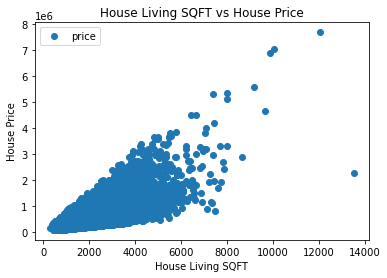

In [8]:
# Create a scatterplot.

df.plot(x = 'sqft_living', y='price',style='o') 
plt.title('House Living SQFT vs House Price')  
plt.xlabel('House Living SQFT')  
plt.ylabel('House Price')  
plt.show()

# STEP5 Hypothesis 

If a house has a larger square footage, then the home's price will be greater.

# STEP6 Reshape the variables into NumPy arrays

In [9]:
X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [10]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [12]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

# STEP7 Split the data into two sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# STEP8 Run a linear regression

## Create a regression object.

In [14]:
regression = LinearRegression()

## Fit the regression object onto the training set.

In [15]:
regression.fit(X_train, y_train)

LinearRegression()

## Predict the values of y using X.

In [16]:
y_predicted = regression.predict(X_test)

# STEP9 Create a plot that shows the regression line

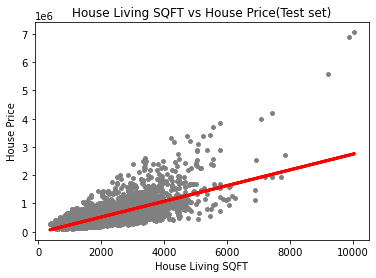

In [17]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('House Living SQFT vs House Price(Test set)')
plot_test.xlabel('House Living SQFT')
plot_test.ylabel('House Price')
plot_test.show()

# STEP10 Interpretation of how well the line appears to fit the data

When SQFT is smaller, the data is more compact (closer to the regression line); as SQFT increases, the data becomes more dispersed (farther from the regression line).

# STEP11 Check the model performance statistics

In [18]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [19]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.50893905]]
Mean squared error:  70250068245.5529
R2 score:  0.4889457082732054


# STEP12 Compare the predicted y values with the actual y values

In [20]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,297000.0,3.600927e+05
1,1580000.0,1.262462e+06
2,562100.0,3.628778e+05
3,631500.0,2.765400e+05
4,780000.0,8.474833e+05
5,485000.0,4.213646e+05
6,340000.0,4.408603e+05
7,335606.0,6.686806e+05
8,425000.0,6.469569e+05
9,490000.0,1.203975e+06


# STEP13 How well the model performed

The R2 value is only 0.48, indicating that the model's fit is not very good.

Upon observation, there are only 6 points where SQFT is greater than 9000, and their prices are significantly higher than other houses. You can choose to exclude these points and see if it improves the model.

In [22]:
df[df['sqft_living'] >9000]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
3914,3914,9808700762,20140611T000000,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214
4411,4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233
7252,7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323
8092,8092,1924059029,20140617T000000,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210
9254,9254,9208900037,20140919T000000,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240
12777,12777,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986


In [23]:
df_9 = df[df['sqft_living'] < 9000] 

In [24]:
X1 = df_9['sqft_living'].values.reshape(-1,1)
y1 = df_9['price'].values.reshape(-1,1)

In [25]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [27]:
regression.fit(X_train1, y_train1)

LinearRegression()

In [28]:
y_predicted1 = regression.predict(X_test1)

In [29]:
rmse1 = mean_squared_error(y_test1, y_predicted1) # This is the mean squared error
r2_1 = r2_score(y_test1, y_predicted1) # This is the R2 score. 

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse1)
print('R2 score: ', r2_1)

Slope: [[276.06652358]]
Mean squared error:  60997161035.91043
R2 score:  0.48819362111458986


The results indicate that this does not improve the model's fit.

Since the data is more compact when SQFT is smaller, let's try limiting SQFT to below 4000 and see how the model performs.

In [32]:
df_4 = df[df['sqft_living'] < 4000] 

In [33]:
X2 = df_4['sqft_living'].values.reshape(-1,1)
y2 = df_4['price'].values.reshape(-1,1)

In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [35]:
regression.fit(X_train2, y_train2)

LinearRegression()

In [36]:
y_predicted2 = regression.predict(X_test2)

In [37]:
rmse2 = mean_squared_error(y_test2, y_predicted2) # This is the mean squared error
r2_2 = r2_score(y_test2, y_predicted2) # This is the R2 score. 

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r2_2)

Slope: [[224.65381756]]
Mean squared error:  45650721959.85643
R2 score:  0.38310510813317245


The results show that even for data where SQFT is less than 4000, the model's performance is still not very good. Therefore, the linear relationship of the single variable SQFT cannot accurately predict housing prices.